In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

# Data Preperation

In [2]:
data = pd.read_csv('Dataset/UNR-IDD.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [3]:
data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [4]:
print("Size: " + str(data.size))
print("Shape: " + str(data.shape))
print("-----------------------")
print(data.value_counts('Binary Label'))
print("-----------------------")
print(data.value_counts('Label'))

Size: 1271974
Shape: (37411, 34)
-----------------------
Binary Label
Attack    33638
Normal     3773
Name: count, dtype: int64
-----------------------
Label
PortScan     9500
TCP-SYN      9081
Blackhole    8420
Diversion    5615
Normal       3773
Overflow     1022
Name: count, dtype: int64


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries 

<Axes: xlabel='Binary Label', ylabel='count'>

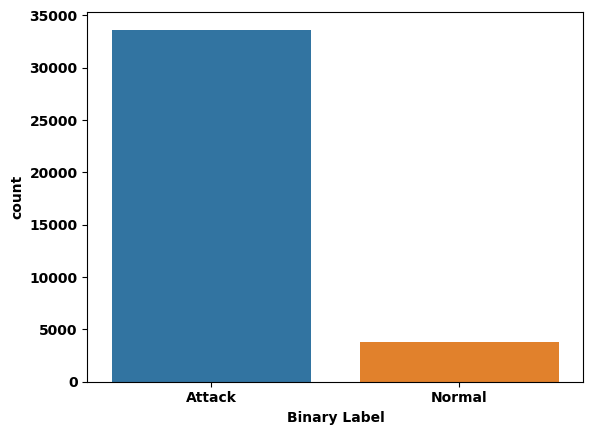

In [7]:
#Binary Label
sns.countplot(data=data, x="Binary Label")

<Axes: xlabel='Label', ylabel='count'>

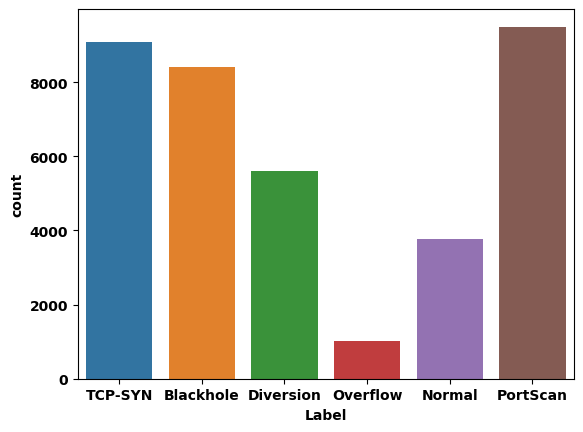

In [8]:
#Label
sns.countplot(data=data, x="Label")

In [9]:
#All_feature
all_feature = data.columns
all_feature

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [10]:
#Split Attack and Normal from dataframe
data_attack = data[data['Binary Label'] == 'Attack']

#Optional
#data_normal = data[data['Binary Label'] == 'Normal']

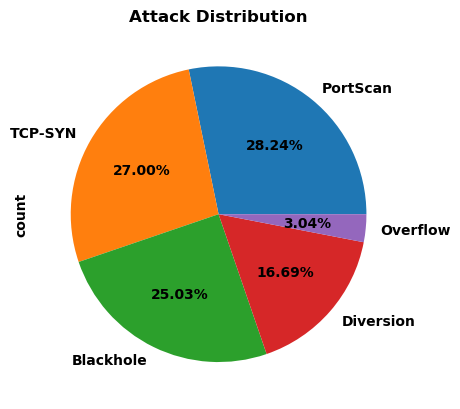

In [11]:
#Attack Distribution
data_attack['Label'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Distribution")
plt.show()

In [12]:
#Label Encoding:
# TCP-SYN > 0
# Blackhole > 1
# Diversion > 2
# Overflow > 3
# PortScan > 4
data_attack.loc[:, 'Label'] = data_attack['Label'].replace(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow', 'PortScan'], [0, 1, 2, 3, 4])

<Axes: xlabel='Label', ylabel='count'>

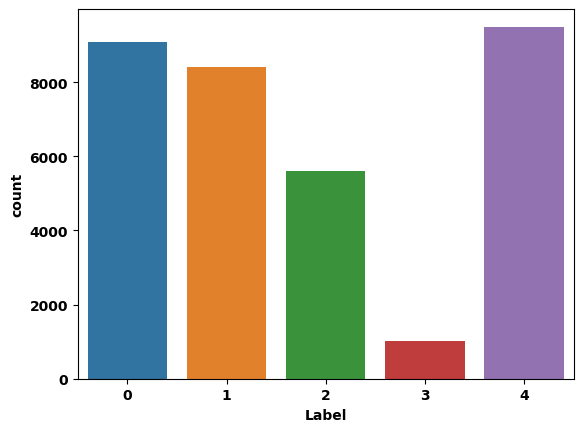

In [13]:
#After label encoding
sns.countplot(data=data_attack, x="Label")

In [14]:
#Feature Selection
feature = data_attack.drop(['Switch ID','Port Number','Packets Rx Dropped','Packets Tx Dropped','Packets Rx Errors','Packets Tx Errors',
                  'Delta Packets Rx Dropped',' Delta Packets Tx Dropped','Delta Packets Rx Errors','Delta Packets Tx Errors',
                  'is_valid','Table ID','Max Size','Binary Label'], axis=1)
feature.dtypes

Received Packets                  int64
Received Bytes                    int64
Sent Bytes                        int64
Sent Packets                      int64
Port alive Duration (S)           int64
Delta Received Packets            int64
Delta Received Bytes              int64
Delta Sent Bytes                  int64
Delta Sent Packets                int64
Delta Port alive Duration (S)     int64
Connection Point                  int64
Total Load/Rate                   int64
Total Load/Latest                 int64
Unknown Load/Rate                 int64
Unknown Load/Latest               int64
Latest bytes counter              int64
Active Flow Entries               int64
Packets Looked Up                 int64
Packets Matched                   int64
Label                            object
dtype: object

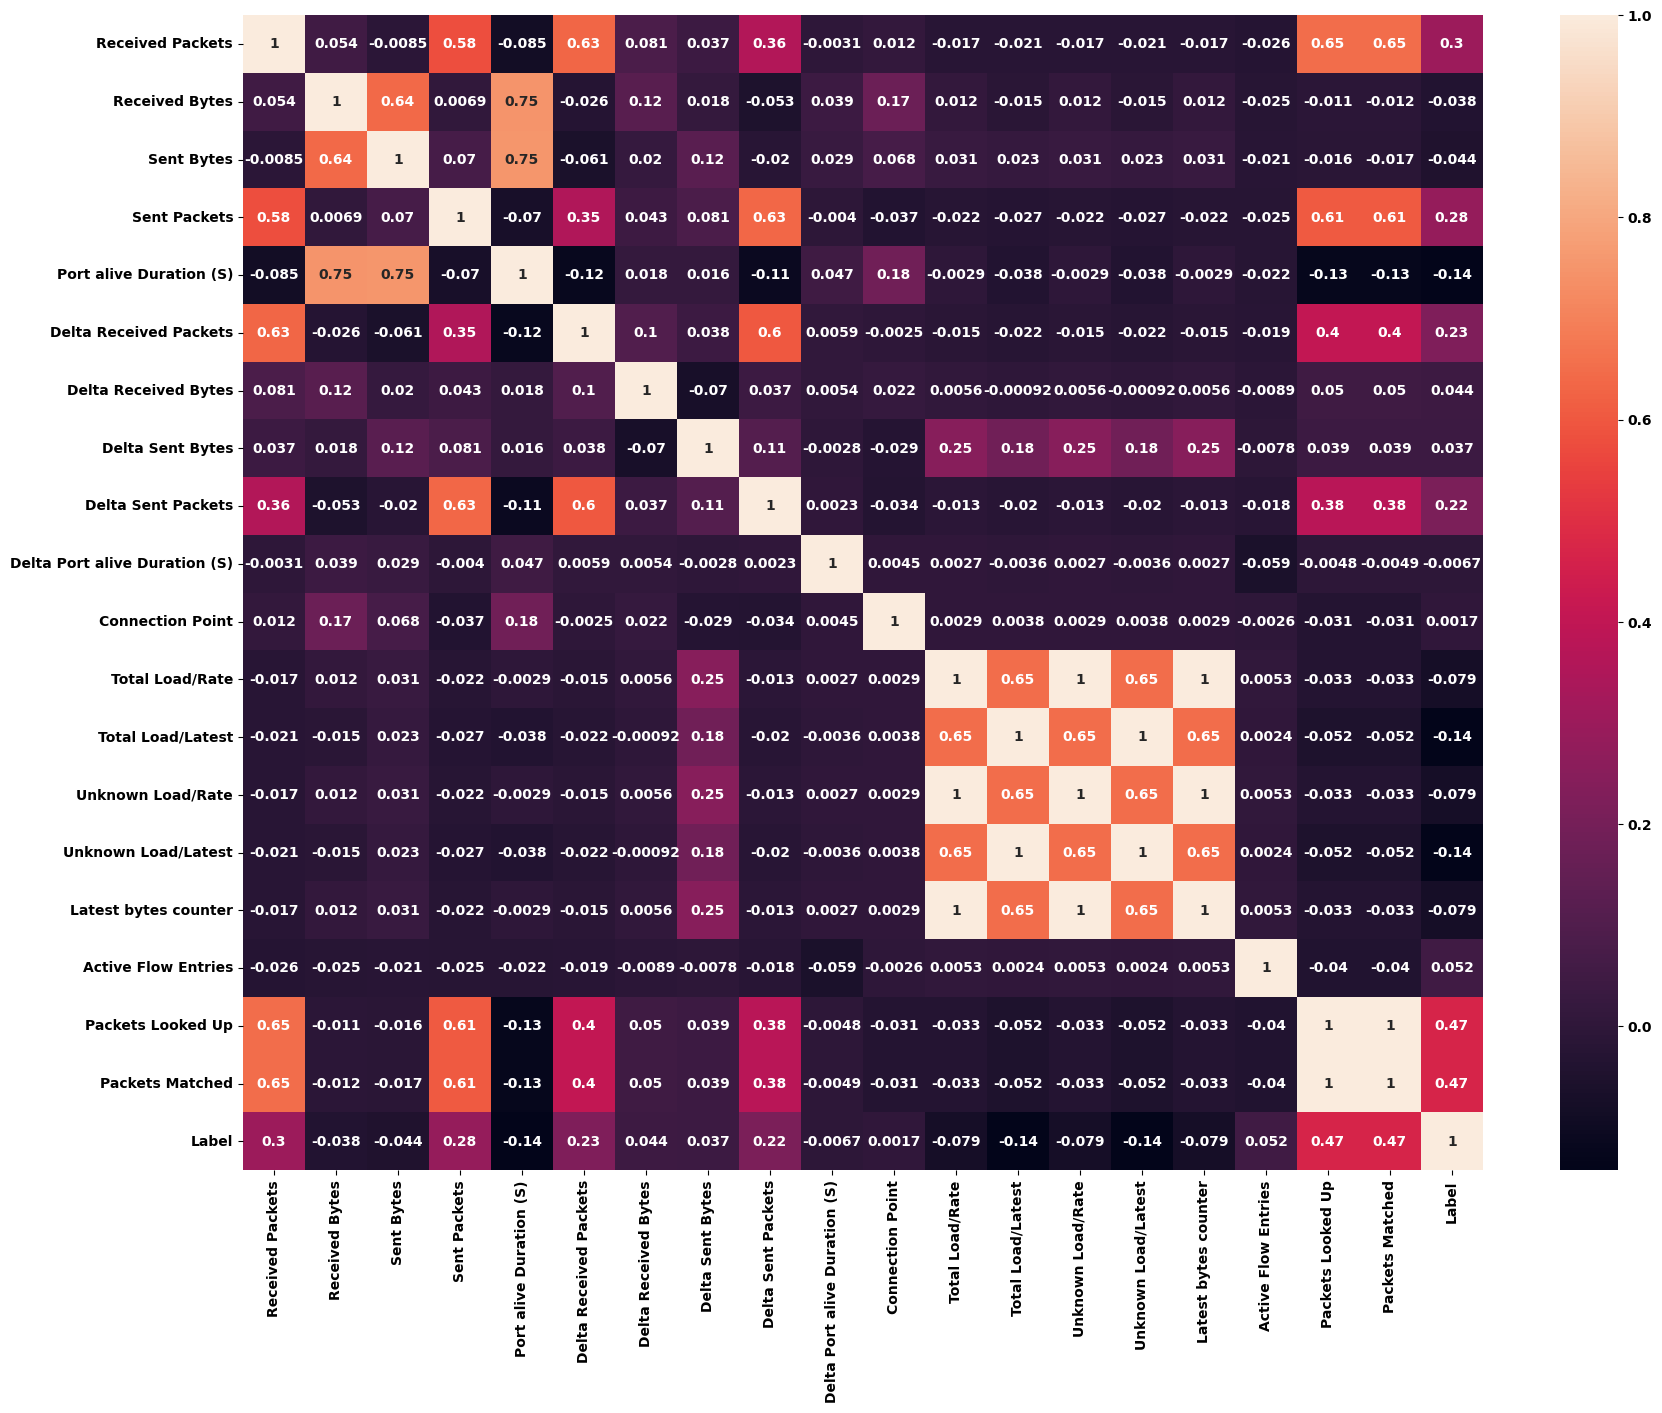

In [15]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[20,15])
sns.heatmap(feature.corr(),annot=True)
plt.show()

In [ ]:
#Summary Report (Optional)
#dataReport = ProfileReport(feature)
#dataReport

# Balancing Data

In [16]:
#Splitting the dataset into dependent and independent feature
X = feature.drop(columns=['Label'])
y = feature["Label"].astype('int64')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((23545, 19), (23545,), (10092, 19), (10092,))

SMOTE-TOMEK

In [18]:
smt = SMOTETomek(sampling_strategy='auto')
#smt = SMOTETomek(sampling_strategy=dict({2: 8000, 3: 7800}))
X_smt, y_smt = smt.fit_resample(X_train, y_train)

<Axes: xlabel='Label', ylabel='count'>

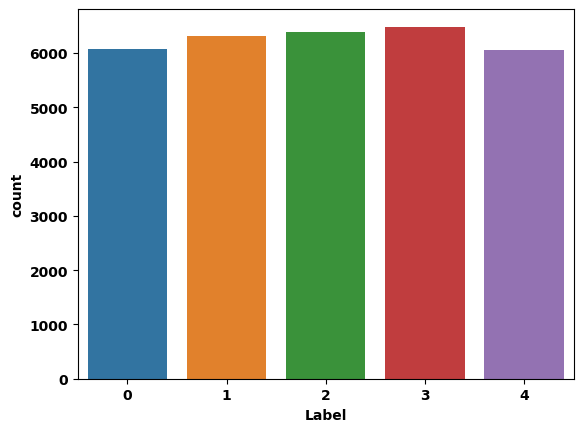

In [19]:
#Create new dataframe from X_smt and y_smt to count every attack
data_smt = pd.concat([X_smt, y_smt], axis=1)

sns.countplot(data=data_smt, x="Label")

In [20]:
data_smt.drop_duplicates(inplace=True)
print(data_smt.value_counts('Label'))
print("--------------------")
print("Shape: " + str(data_smt.shape))
print("--------------------")
print("Duplicates: " + str(data_smt.duplicated().sum()))

Label
3    6480
2    6384
1    6319
0    6065
4    6052
Name: count, dtype: int64
--------------------
Shape: (31300, 20)
--------------------
Duplicates: 0


# Modeling

In [21]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))


In [22]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_train, y_test, p_train, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_train = metrics.accuracy_score(y_train, p_train)
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on training Data: {:.3f}".format(acc_train))
    print("Accuracy on test Data: {:.3f}\n".format(acc_test))

    #computing f1 score
    f1_score_train = metrics.f1_score(y_train, p_train, average='micro')
    f1_score_test = metrics.f1_score(y_test, p_test, average='micro')
    print("F1 score on training Data: {:.3f}".format(f1_score_train))
    print("F1 score on test Data: {:.3f}\n".format(f1_score_test))

    #computing recall score
    recall_score_train = metrics.recall_score(y_train, p_train, average='micro')
    recall_score_test = metrics.recall_score(y_test, p_test, average='micro')
    print("Recall score on training Data: {:.3f}".format(recall_score_train))
    print("Recall score on test Data: {:.3f}\n".format(recall_score_test))

    #computing precision score
    precision_score_train = metrics.precision_score(y_train, p_train, average='micro')
    precision_score_test = metrics.precision_score(y_test, p_test, average='micro')
    print("F1 score on training Data: {:.3f}".format(precision_score_train))
    print("F1 score on test Data: {:.3f}\n".format(precision_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, f1_score_test, recall_score_test, precision_score_test)


In [23]:
#split data after balancing
X_smt = data_smt.drop(columns=["Label"])
y_smt = data_smt['Label']

X_smt_train, X_smt_test, y_smt_train, y_smt_test = train_test_split(X_smt, y_smt, test_size=0.30, random_state=42)
X_smt_train.shape, y_smt_train.shape, X_smt_test.shape, y_smt_test.shape

((21910, 19), (21910,), (9390, 19), (9390,))

Decision Tree

In [24]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
destree = DecisionTreeClassifier(max_depth=30)

#fit the model
destree.fit(X_smt_train, y_smt_train)

DecisionTreeClassifier(max_depth=30)

In [25]:
#predicting
p_train_destree = destree.predict(X_smt_train)
p_test_destree = destree.predict(X_smt_test)

In [26]:
#call report function
model_report(str(destree), y_smt_train, y_smt_test, p_train_destree, p_test_destree)

Model:DecisionTreeClassifier(max_depth=30)

Accuracy on training Data: 1.000
Accuracy on test Data: 0.915

F1 score on training Data: 1.000
F1 score on test Data: 0.915

Recall score on training Data: 1.000
Recall score on test Data: 0.915

F1 score on training Data: 1.000
F1 score on test Data: 0.915

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1846
           1       0.93      0.94      0.94      1833
           2       0.95      0.95      0.95      1930
           3       0.95      0.94      0.95      1983
           4       0.88      0.86      0.87      1798

    accuracy                           0.92      9390
   macro avg       0.91      0.91      0.91      9390
weighted avg       0.91      0.92      0.91      9390



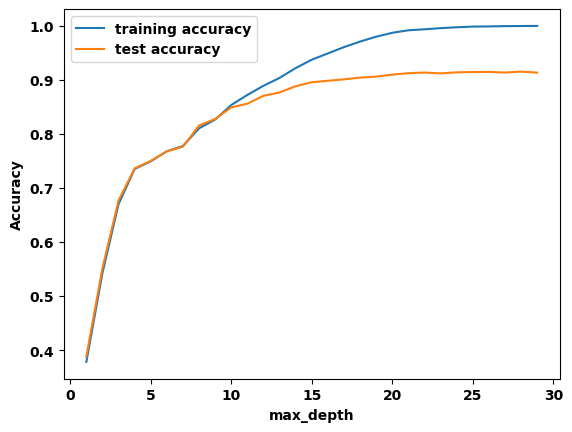

In [27]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
depth = range(1, 30)
for n in depth:
    destree_test = DecisionTreeClassifier(max_depth=n)

    destree_test.fit(X_smt_train, y_smt_train)
    #record training set accuracy
    training_accuracy.append(destree_test.score(X_smt_train, y_smt_train))
    #recor generalization accuracy
    test_accuracy.append(destree_test.score(X_smt_test, y_smt_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Logistic Regression

In [28]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

#instantiate the model
log = LogisticRegression()

#fit the model
log.fit(X_smt_train, y_smt_train)

c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#predicting
p_train_log = log.predict(X_smt_train)
p_test_log = log.predict(X_smt_test)

In [30]:
#call report function
model_report(str(log), y_smt_train, y_smt_test, p_train_log, p_test_log)

Model:LogisticRegression()

Accuracy on training Data: 0.362
Accuracy on test Data: 0.369

F1 score on training Data: 0.362
F1 score on test Data: 0.369

Recall score on training Data: 0.362
Recall score on test Data: 0.369

F1 score on training Data: 0.362
F1 score on test Data: 0.369

Classification Report
              precision    recall  f1-score   support

           0       0.33      0.12      0.17      1846
           1       0.22      0.14      0.17      1833
           2       0.33      0.85      0.48      1930
           3       0.36      0.12      0.18      1983
           4       0.58      0.61      0.60      1798

    accuracy                           0.37      9390
   macro avg       0.36      0.37      0.32      9390
weighted avg       0.36      0.37      0.32      9390



K-Nearest Neighbors: Classifier

In [31]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

#fit the model
knn.fit(X_smt_train, y_smt_train)

KNeighborsClassifier()

In [32]:
#predicting
p_train_knn = knn.predict(X_smt_train)
p_test_knn = knn.predict(X_smt_test)

In [33]:
#call report function
model_report(str(knn), y_smt_train, y_smt_test, p_train_knn, p_test_knn)

Model:KNeighborsClassifier()

Accuracy on training Data: 0.890
Accuracy on test Data: 0.834

F1 score on training Data: 0.890
F1 score on test Data: 0.834

Recall score on training Data: 0.890
Recall score on test Data: 0.834

F1 score on training Data: 0.890
F1 score on test Data: 0.834

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1846
           1       0.81      0.81      0.81      1833
           2       0.84      0.89      0.87      1930
           3       0.88      0.87      0.87      1983
           4       0.84      0.77      0.80      1798

    accuracy                           0.83      9390
   macro avg       0.83      0.83      0.83      9390
weighted avg       0.83      0.83      0.83      9390



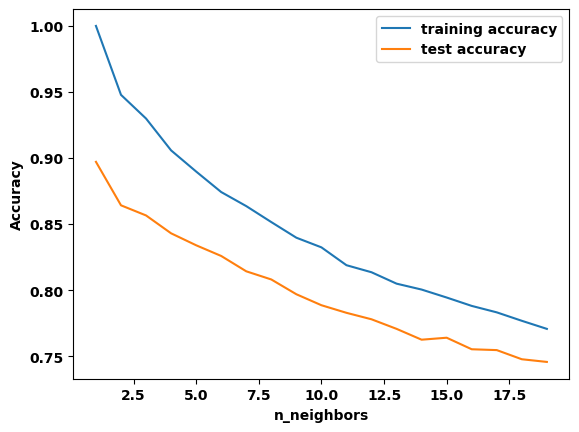

In [34]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    knn1 = KNeighborsClassifier(n_neighbors=n)

    knn1.fit(X_smt_train, y_smt_train)
    #record training set accuracy
    training_accuracy.append(knn1.score(X_smt_train, y_smt_train))
    #record generalization accuracy
    test_accuracy.append(knn1.score(X_smt_test, y_smt_test))

#plotting the training & accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Naive Bayes: Classifier

In [35]:
#import naive bayes classifier
from sklearn.naive_bayes import GaussianNB

#instantiate the model
nb = GaussianNB()

#fit the model
nb.fit(X_smt_train, y_smt_train)

GaussianNB()

In [36]:
#predicting
p_train_nb = nb.predict(X_smt_train)
p_test_nb = nb.predict(X_smt_test)

In [37]:
#call report function
model_report(str(nb), y_smt_train, y_smt_test, p_train_nb, p_test_nb)

Model:GaussianNB()

Accuracy on training Data: 0.550
Accuracy on test Data: 0.558

F1 score on training Data: 0.550
F1 score on test Data: 0.558

Recall score on training Data: 0.550
Recall score on test Data: 0.558

F1 score on training Data: 0.550
F1 score on test Data: 0.558

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.49      0.52      1846
           1       0.44      0.37      0.40      1833
           2       0.63      0.56      0.59      1930
           3       0.45      0.79      0.57      1983
           4       1.00      0.56      0.72      1798

    accuracy                           0.56      9390
   macro avg       0.61      0.55      0.56      9390
weighted avg       0.61      0.56      0.56      9390



Random Forest: Classifier

In [38]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
ranfor = RandomForestClassifier(n_estimators=10)

#fit the model
ranfor.fit(X_smt_train, y_smt_train)

RandomForestClassifier(n_estimators=10)

In [39]:
#predicting
p_train_ranfor = ranfor.predict(X_smt_train)
p_test_ranfor = ranfor.predict(X_smt_test)

In [40]:
#call report function
model_report(str(ranfor), y_smt_train, y_smt_test, p_train_ranfor, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=10)

Accuracy on training Data: 0.999
Accuracy on test Data: 0.942

F1 score on training Data: 0.999
F1 score on test Data: 0.942

Recall score on training Data: 0.999
Recall score on test Data: 0.942

F1 score on training Data: 0.999
F1 score on test Data: 0.942

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1846
           1       0.96      0.97      0.96      1833
           2       0.98      0.96      0.97      1930
           3       0.97      0.97      0.97      1983
           4       0.91      0.88      0.90      1798

    accuracy                           0.94      9390
   macro avg       0.94      0.94      0.94      9390
weighted avg       0.94      0.94      0.94      9390



Gradient Boosting Classifier

In [41]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate the model
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)

#fit the model
gbc.fit(X_smt_train, y_smt_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [42]:
#predicting
p_train_gbc = gbc.predict(X_smt_train)
p_test_gbc = gbc.predict(X_smt_test)

In [43]:
#call report function
model_report(str(gbc), y_smt_train, y_smt_test, p_train_gbc, p_test_gbc)

Model:GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

Accuracy on training Data: 1.000
Accuracy on test Data: 0.960

F1 score on training Data: 1.000
F1 score on test Data: 0.960

Recall score on training Data: 1.000
Recall score on test Data: 0.960

F1 score on training Data: 1.000
F1 score on test Data: 0.960

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1846
           1       0.98      0.98      0.98      1833
           2       0.99      0.98      0.98      1930
           3       0.99      0.98      0.99      1983
           4       0.92      0.92      0.92      1798

    accuracy                           0.96      9390
   macro avg       0.96      0.96      0.96      9390
weighted avg       0.96      0.96      0.96      9390



XGBoost Classifier

In [44]:
#import xgboost classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier()

#fit the model
xgb.fit(X_smt_train, y_smt_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
#predicting
p_train_xgb = xgb.predict(X_smt_train)
p_test_xgb = xgb.predict(X_smt_test)

In [46]:
#call report function
model_report(str(xgb), y_smt_train, y_smt_test, p_train_xgb, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Accuracy on training Data: 0.996
Accuracy on test Data: 0.965

F1 score on training Data: 0.996
F1 score on test Data: 0.965

Recall score on training Data: 0.996
Recall score on test Data: 0.965

F1 score on training Data: 0.996
F1

Multi-layer Perceptron Classifier

In [47]:
#import MLP
from sklearn.neural_network import MLPClassifier

#instantiate the model
mlp = MLPClassifier()

#fit the model
mlp.fit(X_smt_train, y_smt_train)

MLPClassifier()

In [48]:
#predicting
p_train_mlp = mlp.predict(X_smt_train)
p_test_mlp = mlp.predict(X_smt_test)

In [49]:
#call report function
model_report(str(mlp), y_smt_train, y_smt_test, p_train_mlp, p_test_mlp)

Model:MLPClassifier()

Accuracy on training Data: 0.474
Accuracy on test Data: 0.468

F1 score on training Data: 0.474
F1 score on test Data: 0.468

Recall score on training Data: 0.474
Recall score on test Data: 0.468

F1 score on training Data: 0.474
F1 score on test Data: 0.468

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1846
           1       0.32      0.61      0.42      1833
           2       0.60      0.32      0.42      1930
           3       0.50      0.44      0.47      1983
           4       0.81      0.58      0.67      1798

    accuracy                           0.47      9390
   macro avg       0.53      0.47      0.48      9390
weighted avg       0.53      0.47      0.47      9390



Support Vector Machine: Classification

In [50]:
#import SVM
from sklearn.svm import SVC

#instantiate the model
svm = SVC()

#fit the model
svm.fit(X_smt_train, y_smt_train)

SVC()

In [51]:
#predicting
p_train_svm = svm.predict(X_smt_train)
p_test_svm = svm.predict(X_smt_test)

In [52]:
#call report function
model_report(str(svm), y_smt_train, y_smt_test, p_train_svm, p_test_svm)

Model:SVC()

Accuracy on training Data: 0.443
Accuracy on test Data: 0.451

F1 score on training Data: 0.443
F1 score on test Data: 0.451

Recall score on training Data: 0.443
Recall score on test Data: 0.451

F1 score on training Data: 0.443
F1 score on test Data: 0.451

Classification Report
              precision    recall  f1-score   support

           0       0.37      0.69      0.48      1846
           1       0.55      0.27      0.37      1833
           2       0.66      0.68      0.67      1930
           3       0.37      0.46      0.41      1983
           4       0.38      0.12      0.18      1798

    accuracy                           0.45      9390
   macro avg       0.47      0.45      0.42      9390
weighted avg       0.47      0.45      0.43      9390



# Result

Comparison of Models

In [53]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'F1 Score' : f1_score,
                       'Recall' : recall,
                       'Precision' : precision
                       })

In [54]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,"XGBClassifier(base_score=None, booster=None, c...",0.965,0.965,0.965,0.965
1,"GradientBoostingClassifier(learning_rate=0.7, ...",0.960,0.960,0.960,0.960
2,RandomForestClassifier(n_estimators=10),0.942,0.942,0.942,0.942
3,DecisionTreeClassifier(max_depth=30),0.915,0.915,0.915,0.915
4,KNeighborsClassifier(),0.834,0.834,0.834,0.834
5,GaussianNB(),0.558,0.558,0.558,0.558
6,MLPClassifier(),0.468,0.468,0.468,0.468
7,SVC(),0.451,0.451,0.451,0.451
8,LogisticRegression(),0.369,0.369,0.369,0.369


In [55]:
#save result to csv file
sorted_result.to_csv('latihan2_result.csv')